In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

#Reading the dataset in a dataframe using Pandas
df = pd.read_csv("train.csv") 

#Let's look at the data!
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [2]:
#Now let's learn about some of the numerical fields
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


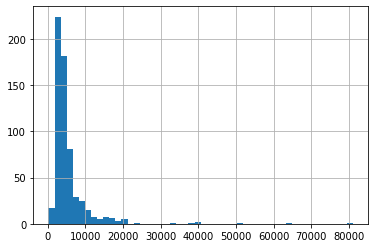

In [4]:
#Another way to understand the numerical data is to visualize it
#We can plot one of these distributions easily in just one line
df['ApplicantIncome'].hist(bins=50)

In [ ]:
#We can also use box plots and segment the information out
df.boxplot(column='ApplicantIncome', by = 'Education')

In [ ]:
#To understand categorical (non-numerical) features we can look at the distribution to gain a better understanding 
df['Property_Area'].value_counts()

In [8]:
'''
Now let's get into part of what we are here for, predicting loan approval
To me, one of the variables that could be important is whether you have a credit history
We'll start by looking at the distribution of that field
'''

temp1 = df['Credit_History'].value_counts(ascending=True)
temp2 = df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

print ('\nProbility of getting loan for each Credit History class:')
print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64

Probility of getting loan for each Credit History class:
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


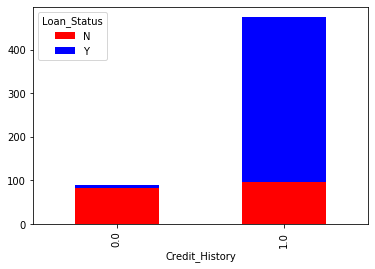

In [9]:
#As to be expected, it is much easier to get a loan once you have at least some credit history
#This is ploted so it is easier to see below

temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

Loan_Status             N    Y
Credit_History Gender         
0.0            Female  16    1
               Male    63    6
1.0            Female  20   64
               Male    75  307


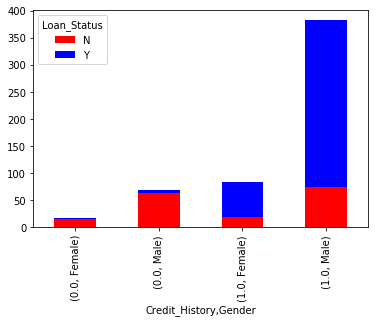

In [10]:
#You can also add gender into the mix and start creating a very basic classification algorithm 
#These are similar to pivot tables in excel, just with more functionality and can process more data
temp4 = pd.crosstab([df.Credit_History, df.Gender], df['Loan_Status'])
print(temp4)
temp4.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [11]:
'''
Now before we move along to build actual models, we must go back to some of the initial problems we noticed
when we first reviewed the data. This included:
1) Missing values
2) Extremes/Outliers

Topic (2) is sometthing we could look into given more time, but missing values are a much bigger issue
and so I will only focus on (1) during this workshop
'''

#Use the function below to check the number of null (empty) values for each field
df.apply(lambda x: sum(x.isnull()),axis=0) 


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
'''
How might we address some of these errors?
One way would be to get rid of that feature in our analysis entirely. 
- If this field is relevant, that may not be the best
Another way would be to set it to the mean, median, or mode. We'll use the mean value below
'''
#Commented out because we will discuss a better way later
#df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

"\nHow might we address some of these errors?\nOne way would be to get rid of that feature in our analysis entirely. \n- If this field is relevant, that may not be the best\nAnother way would be to set it to the mean, median, or mode. We'll use the mean value below\n"

In [13]:
#For categorical values it may be more difficult. In the case of binary variables we can choose the more common case
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [14]:
df['Self_Employed'].fillna('No',inplace=True)

In [15]:
'''
A more complicated way to fill in the null loan amount values would be to break find the mean/median/mode
for each segment. In the code below, we break this up by the binary "Self_Employed" and "Education" features
and then use the median value for each category, somewhat factoring out the extremes
'''

table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
# Define function to return value of this pivot_table
def fage(x):
 return table.loc[x['Self_Employed'],x['Education']]
# Replace missing values
df['LoanAmount'].fillna(df[df['LoanAmount'].isnull()].apply(fage, axis=1), inplace=True)

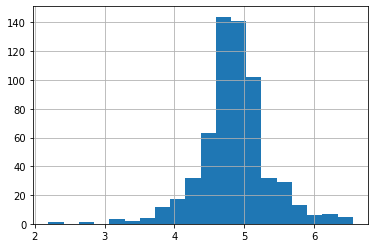

In [16]:
#Another way to factor in extremes is to use logs of the input values.
#We see a much nicer distribution of Loan Amounts when we use that below

df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [17]:
#Now let's finish out addressing the null values for the remaining fields:
#Gender, Married, Dependents, Loan_Amount_Term, and Credit_History

df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

#Since credit history is such a deciding factor with many missing values, I'm going to drop these cases altogether
df.dropna(axis=0, subset=['Credit_History'], inplace=True)

#Clearly there are additional (probably better) ways to adjust dealing with these missing values, but given the
#timeframe of the workshop we won't bother with dig into other options right now.


In [18]:
#Check that the null values are actually gone (it didn't work at first when I was going through this workshop)
df.head(100)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,130.0,360.0,1.0,Urban,Y,4.867534
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,4.948760
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y,5.587249
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,4.553877
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N,5.062595
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y,5.123964
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N,5.855072


In [19]:
#You can use the commented out code below to check the data types of each of the columns in your dataframe
#df.dtypes

In [62]:
#Now before we actually test, make sure to seperate the labels from the features
# Filter to only the features
train_predictors = df.loc[:, df.columns != 'Loan_Status']
# The target we're using to train the algorithm
train_target = df['Loan_Status']


In [64]:
#We are so close to being able to build a model! 
#We'll begin the preparation by breaking the training data into training and validation data
# (This is typically done when you have a medium-sized data set, and isn't as important here with only 624 samples)

from sklearn.model_selection import train_test_split
#Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(encoded_x, label)encoded_y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

#"Cardinality" means the number of unique values in a column - found in the nunique() function
#Select categorical columns with relatively low cardinality (convenient but arbitrary)
#Again, in our case this isn't as relevant but it would totally be for claims data
categorical_cols = [cname for cname in X_train.columns if
                    X_train[cname].nunique() < 10 and 
                    X_train[cname].dtype == "object"]

#Select numerical columns
numerical_cols = [cname for cname in X_train.columns if 
                X_train[cname].dtype in ['int64', 'float64']]

#Keep selected columns only
my_cols = categorical_cols + numerical_cols
train_df = X_train[my_cols].copy()
valid_df = X_valid[my_cols].copy()


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 15)

In [65]:
#We'll import a bunch of librarys we will use for a few steps of pre-processing, and then building models

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [66]:
#Let's pre-process the data to one-hot encode the categorical variables before building the model
#Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

#Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [95]:
#Now we can build our first model!!!

#We'll use XGBoost classifier

#Define the model
XGB_model = XGBClassifier()

#Bundle preprocessing and modeling code in a pipeline
classifier = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', XGB_model)
                     ])

#Preprocessing of training data, fit model 
classifier.fit(X_train, y_train)

#Preprocessing of validation data, get predictions
easypreds = classifier.predict(X_train)
preds = classifier.predict(X_valid)

accuracy = accuracy_score(y_train, easypreds)
cv_accuracy = accuracy_score(y_valid, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Cross-Validation Accuracy: %.2f%%" % (cv_accuracy * 100.0))

Accuracy: 85.81%
Cross-Validation Accuracy: 76.99%


In [68]:
'''
Now that is probably not as great it as we'd like it to be, but what we can do is change the parameters

The default parameters are given below:

max_depth=3
learning_rate=0.1
n_estimators=100
silent=True
objective='binary:logistic'
booster='gbtree'
n_jobs=1
nthread=None
gamma=0
min_child_weight=1
max_delta_step=0
subsample=1
colsample_bytree=1
colsample_bylevel=1
reg_alpha=0
reg_lambda=1
scale_pos_weight=1
base_score=0.5
random_state=0
seed=None
missing=None
'''

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-68-83bc72e31cd7>, line 2)

In [96]:
#We probably want a greater tree depth
#Let's try it again below

# Define model
XGB_model2 = XGBClassifier(max_depth=10)

# Bundle preprocessing and modeling code in a pipeline
classifier2 = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', XGB_model2)
                     ])

# Preprocessing of training data, fit model 
classifier2.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
easypreds = classifier2.predict(X_train)
preds = classifier2.predict(X_valid)

accuracy = accuracy_score(y_train, easypreds)
cv_accuracy = accuracy_score(y_valid, preds)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Cross-Validation Accuracy: %.2f%%" % (cv_accuracy * 100.0))


Accuracy: 99.78%
Cross-Validation Accuracy: 81.42%
